In [1]:
import pandas as pd
import dostoevsky
import string
import re
import datetime
import time

Предварительно в командной строке нужно сделать: python3 -m dostoevsky download fasttext-social-network-model

In [2]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [3]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

Рассматриваемый временной промежуток:

00:00:00 01.01.2014 = 1388534400

00:00:00 01.01.2024 = 1704067200

In [4]:
df=pd.DataFrame()
df['date_num']=list(range(16071, 19723, 1))
df['date']=pd.date_range('2014-01-01', '2023-12-31')
df=df.set_index('date_num')
df['num']=0
df['num_cb']=0
df['sum_mood']=0
df['sum_mood_cb']=0

In [5]:
def work_with_comments(comments):
    comments=comments[comments['text'].notna()]
    comments=comments.reset_index()
    comments=comments.drop(columns=['index'])
    comments['clean_text']=''
    comments['keyword_i']=0
    comments['mood']=0
    i=0
    for i in range (len(comments)):
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        message=[comments.iloc[i]['text']]
        results = model.predict(message, k=5)
        comments.loc[i,'mood']=results[0]['positive']-results[0]['negative']
    return comments

In [6]:
def make_df_per_day(comments, comments_cb):
    for i in range(len(comments)):
        if (comments['comment_time'][i]<1704067200 and comments['comment_time'][i]>1388534400):
            df.loc[comments['comment_time'][i]//86400, 'num']=df['num'][comments['comment_time'][i]//86400]+1
            df.loc[comments['comment_time'][i]//86400,'sum_mood']=df.loc[comments['comment_time'][i]//86400,'sum_mood']+comments['mood'][i]
    for i in range(len(comments_cb)):
        if (comments_cb['comment_time'][i]<1704067200 and comments_cb['comment_time'][i]>1388534400):
            df.loc[comments_cb['comment_time'][i]//86400, 'num_cb']=df['num_cb'][comments_cb['comment_time'][i]//86400]+1
            df.loc[comments_cb['comment_time'][i]//86400,'sum_mood_cb']=df.loc[comments_cb['comment_time'][i]//86400,'sum_mood_cb']+comments_cb['mood'][i]
    return df

# aif_ru

In [7]:
data=pd.read_csv('aif_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('aif_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1138693,что уже Дальневосточный льготный гектар никому...,1584453896,11298783,что уже дальневосточный льготный гектар никому...,0,-0.277056
1,2236421,"Ввезти ведь,а не вывезти!",1692304548,691425151,ввезти ведьа не вывезти,0,-0.022533
2,2236421,"Не хотят наши власти, чтоб людям жилось хорошо...",1692321591,548839550,не хотят наши власти чтоб людям жилось хорошо ...,0,-0.117484
3,2236421,"Клоун что хотел кого-то подкупать тут, очередн...",1692322774,676449624,клоун что хотел когото подкупать тут очередных...,0,-0.143179
4,2236421,Где-то заработал и решил ввести?----Надо разби...,1692326408,710233104,гдето заработал и решил ввестинадо разбираться...,0,-0.167377
...,...,...,...,...,...,...,...
28089,1073150,"Хотя ответ известен:"" денег нет, но вы держите...",1563785656,308977373,хотя ответ известен денег нет но вы держитесь ...,0,-0.161904
28090,1073150,Очень некорректное сравнение. Нужно не чистый ...,1563786877,170470789,очень некорректное сравнение нужно не чистый д...,0,-0.199606
28091,1073150,Акакий неадекват ?),1563787960,243537564,акакий неадекват,0,-0.125505
28092,1073150,"РФ способна расплатиться с долгами, а США нет...",1563797118,279362575,рф способна расплатиться с долгами а сша нет,0,-0.028024


In [8]:
data_cb=pd.read_csv('aif_ru_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('aif_ru_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1148930,ЦБ не государственный ! По этому и живём в нищ...,1587720062,564715902,цб не государственный по этому и живём в нищете,0,-0.609161
1,1148930,А если заканчивается действие карты 30 июня? Т...,1587724523,132854477,а если заканчивается действие карты 30 июня то...,0,-0.032962
2,1409029,Вот я дурень старый Уазик продал!,1649912634,269778992,вот я дурень старый уазик продал,0,-0.135287
3,1409029,Почему не делать аналоги самим?,1649912734,198909762,почему не делать аналоги самим,0,-0.445530
4,1409029,А с какой это стати прямой импорт из Китая пер...,1649913632,50852415,а с какой это стати прямой импорт из китая пер...,0,-0.097302
...,...,...,...,...,...,...,...
7459,2527229,Северный Кавказ больше всего долгов за ЖКХ жду...,1704015049,708600308,северный кавказ больше всего долгов за жкх жду...,0,-0.040144
7460,2527229,Цены на коммуналку зашкаливают....,1704016499,232563349,цены на коммуналку зашкаливают,0,-0.189452
7461,2527229,Правительство продлило решение об отмене начис...,1704024359,695352659,правительство продлило решение об отмене начис...,0,-0.036937
7462,2527229,"ох спасибочки!!!!! заживем теперь, блин!!!🤣🤣",1704025174,341473031,ох спасибочки заживем теперь блин🤣🤣,0,0.373938


In [9]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,0,0,0.000000,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,158,9,-14.495072,-0.955050
19719,2023-12-28,79,12,-10.340452,-1.820087
19720,2023-12-29,82,4,-13.484186,-0.289194


# expert_ru

In [10]:
data=pd.read_csv('expert_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('expert_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,262150,"Уинстон Черчеилль, став премьер-министром Вели...",1677989646,461379477,уинстон черчеилль став премьерминистром велико...,0,-0.207709
1,262150,Я знаю хорошую лечебницу где могут подлечить т...,1677995725,720738261,я знаю хорошую лечебницу где могут подлечить т...,0,0.219059
2,65544,поэтому у нас борьба с инфляцией превращается ...,1402837915,21083339,поэтому у нас борьба с инфляцией превращается ...,0,-0.123817
3,65544,Это что то новенькое. А инфляцию потушить мож...,1402838179,4481124,это что то новенькое а инфляцию потушить можн...,0,0.062903
4,65544,"[id4481124|Виктор], смотри на график роста ден...",1402839696,20583659,id4481124виктор смотри на график роста денежно...,0,0.056143
...,...,...,...,...,...,...,...
6223,114660,Все смотрим фильм Счастливые люди! И мозг вста...,1436865550,155121805,все смотрим фильм счастливые люди и мозг встаё...,0,0.730736
6224,188393,Да че СМИ и правозащитники это гав...но уже 3 ...,1485808866,2803731,да че сми и правозащитники это гавно уже 3 ден...,0,-0.345440
6225,188393,"[id2803731|Антон], у них другие принципы",1485815980,2447205,id2803731антон у них другие принципы,0,-0.020047
6226,188393,В России бы тоже не помешало ввести такие запреты,1485839156,45368917,в россии бы тоже не помешало ввести такие запреты,0,-0.236238


In [11]:
data_cb=pd.read_csv('expert_ru_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('expert_ru_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,268293,Ого! А сколько тогда удалось мошенникам похитить?,1707840506,27965624,ого а сколько тогда удалось мошенникам похитить,0,0.002220
1,260102,"Очевидно, российский рынок капитала должен пол...",1670910489,710313517,очевидно российский рынок капитала должен полу...,0,-0.200414
2,260102,"Единственная ""мощная мера"" - увеличение количе...",1670931208,51377480,единственная мощная мера увеличение количеств...,0,-0.237088
3,260102,Бизнес через биржу может привлечь капитал. Тол...,1671136050,571261965,бизнес через биржу может привлечь капитал толь...,0,-0.154387
4,260102,Ограбленный директорами через накладные расход...,1671345793,170408811,ограбленный директорами через накладные расход...,0,-0.183267
...,...,...,...,...,...,...,...
2768,86007,"""следовать за ценами на нефть"", - значит, если...",1418303763,24231320,следовать за ценами на нефть значит если нефт...,0,-0.076252
2769,86007,"[id24231320|Jokero], легко. Достаточно вспомни...",1418306241,4637424,id24231320jokero легко достаточно вспомнить ук...,0,-0.035688
2770,86007,Но Медведев же приказал рублю стабилизироваться?,1418313970,19346513,но медведев же приказал рублю стабилизироваться,0,-0.158339
2771,86007,"[id19346513|Дима], а Гонтарева приказала банки...",1418322053,4637424,id19346513дима а гонтарева приказала банкирам ...,0,-0.113934


In [12]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,0,0,0.000000,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,158,9,-14.495072,-0.955050
19719,2023-12-28,80,12,-10.322466,-1.820087
19720,2023-12-29,82,4,-13.484186,-0.289194


# izvestia

In [13]:
data=pd.read_csv('izvestia_all_comments.csv')
data=work_with_comments(data)
data.to_csv('izvestia_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,2916353,"Никому они не нужны , скоро за утилизацию плат...",1650095149,165153794,никому они не нужны скоро за утилизацию плати...,0,-0.669442
1,2916353,"""-Дядюшка Пердлен! Дядюшка Пердлен!\n-Что,Крош...",1650096616,488014499,дядюшка пердлен дядюшка пердлен чтокрошка зипп...,0,-0.060493
2,2916353,"Цены на все повышаются регулярно во всем мире,...",1650105674,707415200,цены на все повышаются регулярно во всем мире ...,0,-0.085242
3,4546564,"Пока цена не снизилась, может ФАС не там и не ...",1700156596,539613482,пока цена не снизилась может фас не там и не н...,0,-0.207629
4,4546564,У нас точно ни кто этим не занят в Калининград...,1700156688,78559089,у нас точно ни кто этим не занят в калининград...,0,-0.043155
...,...,...,...,...,...,...,...
16879,4743165,всех на пожизненное.,1706872502,757977634,всех на пожизненное,0,-0.017066
16880,4743165,Танком раздавят? Сожгут?,1706873567,349269962,танком раздавят сожгут,0,-0.014064
16881,4743165,Как можно было КАНАЛ организовать?,1706876498,716207057,как можно было канал организовать,0,-0.008006
16882,4743165,"Было недавно,шо опять?",1706885060,273178411,было недавношо опять,0,-0.306941


In [14]:
data_cb=pd.read_csv('izvestia_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('izvestia_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1171458,Почему их не запретить? Всем же ясно они нацел...,1530694091,232152488,почему их не запретить всем же ясно они нацеле...,0,-0.603718
1,466959,"Умные люди говорили как-то, что высокая кредит...",1459934618,324244519,умные люди говорили както что высокая кредитос...,0,-0.131846
2,466959,"Значит, будут грабить !...",1459936873,11229668,значит будут грабить,0,-0.022455
3,466959,"На самом деле, есть перспектива такая. Но вот ...",1459936910,238799173,на самом деле есть перспектива такая но вот эк...,0,-0.058184
4,466959,Все деньги у чиновников с их родными и друзьям...,1459937810,101331959,все деньги у чиновников с их родными и друзьям...,0,-0.315300
...,...,...,...,...,...,...,...
8188,4456442,С лицом Путина ?,1696945125,663450128,с лицом путина,0,-0.026759
8189,4456442,А обещанные 10 руб. и 5 руб. бумажными где ест...,1696945223,17907879,а обещанные 10 руб и 5 руб бумажными где есть ...,0,-0.106112
8190,4456442,Счастье то какое,1696946047,200807994,счастье то какое,0,0.993869
8191,4456442,"ну понятное дело, что наша страна соответствуе...",1696952004,763710679,ну понятное дело что наша страна соответствует...,0,-0.050104


In [15]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,0,0,0.000000,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,206,32,-21.083261,-4.812797
19719,2023-12-28,204,30,-38.306840,-6.398941
19720,2023-12-29,156,5,-32.756097,-0.389235


# kommersant

In [16]:
data=pd.read_csv('kommersant_all_comments.csv')
data=work_with_comments(data)
data.to_csv('kommersant_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,3448834,Сколько на СВО ребятам поделиться?,1704626631,278307316,сколько на сво ребятам поделиться,0,-0.001944
1,3448834,Выиграл финна?,1704630487,711424050,выиграл финна,0,0.000000
2,3448834,"Да пофигу, это теннис , у меня на него аллерги...",1704638758,156062346,да пофигу это теннис у меня на него аллергия ...,0,-0.043921
3,3448834,А обзор гольфа,1704679523,15669009,а обзор гольфа,0,-0.010180
4,2228229,Если 3000 компаний с числом сотрудников в них ...,1647599648,12025189,если 3000 компаний с числом сотрудников в них ...,0,-0.251548
...,...,...,...,...,...,...,...
17205,3375096,👏👍,1700489472,417875434,👏👍,0,0.000000
17206,3375096,"Ещё один шоумен. Жди беды, страна Аргентина.",1700502879,829984708,ещё один шоумен жди беды страна аргентина,0,-0.125809
17207,3375096,Элвис,1700511011,545592400,элвис,0,0.000000
17208,3375096,А глаза пустые как у моего водителя!,1700515559,478581902,а глаза пустые как у моего водителя,0,0.037382


In [17]:
data_cb=pd.read_csv('kommersant_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('kommersant_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,2228229,Если 3000 компаний с числом сотрудников в них ...,1647599648,12025189,если 3000 компаний с числом сотрудников в них ...,0,-0.251548
1,2834441,"Че, пенсии с зарплатами повысятся или только б...",1674045538,138697298,че пенсии с зарплатами повысятся или только бе...,0,-0.059875
2,2834441,Ли.ерастам лишь бы повод ныть,1674051843,709300874,лиерастам лишь бы повод ныть,0,-0.489932
3,589834,"Wtf??? То есть, чтоьы обменять деньги, я должн...",1450981958,140993,wtf то есть чтоьы обменять деньги я должна буд...,0,-0.183355
4,589834,Пиздец просто,1450982011,137416195,пиздец просто,0,-0.996017
...,...,...,...,...,...,...,...
10777,3375096,👏👍,1700489472,417875434,👏👍,0,0.000000
10778,3375096,"Ещё один шоумен. Жди беды, страна Аргентина.",1700502879,829984708,ещё один шоумен жди беды страна аргентина,0,-0.125809
10779,3375096,Элвис,1700511011,545592400,элвис,0,0.000000
10780,3375096,А глаза пустые как у моего водителя!,1700515559,478581902,а глаза пустые как у моего водителя,0,0.037382


In [18]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,0,0,0.000000,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,215,34,-22.888533,-5.235292
19719,2023-12-28,314,59,-61.199816,-14.068430
19720,2023-12-29,191,10,-38.980559,-0.774943


# mk_ru

In [19]:
data=pd.read_csv('mk_ru_all_comments.csv')
data=work_with_comments(data)
data.to_csv('mk_ru_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1507328,Коррупция в Москве и на Кавказе цветёт пышным ...,1688037038,429407576,коррупция в москве и на кавказе цветёт пышным ...,0,0.067509
1,401409,Бедный рубль...сколько его знаю все время пада...,1534319053,464699721,бедный рубльсколько его знаю все время падаети...,0,-0.798243
2,401409,"[id464699721|Ironik], это обозначает, что стан...",1534319438,236132417,id464699721ironik это обозначает что становитс...,0,-0.144000
3,401409,"[id236132417|Наталья], ну это хорошо...может и...",1534319524,464699721,id236132417наталья ну это хорошоможет и до нас...,0,-0.155953
4,401409,"[id464699721|Ironik], на том свете.",1534319832,379622292,id464699721ironik на том свете,0,0.060473
...,...,...,...,...,...,...,...
13500,1507323,"- главное, чтобы нам зарплату не стали выплачи...",1688034507,247680196,главное чтобы нам зарплату не стали выплачива...,0,-0.021273
13501,1507323,Только кордоб нам не хватает для счастья.,1688037069,429407576,только кордоб нам не хватает для счастья,0,-0.008745
13502,1359869,Правильно! В наручники их и в тюрягу!,1676039199,548201888,правильно в наручники их и в тюрягу,0,0.034717
13503,1359869,Печальный опыт СССР он наверно забыл.,1676039868,173628274,печальный опыт ссср он наверно забыл,0,-0.902502


In [20]:
data_cb=pd.read_csv('mk_ru_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('mk_ru_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,256000,"03.02.2013 — 02.03.2014 5,5 \n03.03.2014 — 27....",1509102750,198259273,03022013 — 02032014 55 03032014 — 27042014 70...,0,-0.003028
1,40962,Знать бы какой следующий лицензии лишится да и...,1408347392,67202103,знать бы какой следующий лицензии лишится да и...,0,-0.101840
2,49176,Значит не особенно боятся президента.Не указ о...,1418651392,223811321,значит не особенно боятся президентане указ он...,0,-0.105998
3,49176,"А с рейтингом, с рейтингом президента то шо? Р...",1418651730,198510877,а с рейтингом с рейтингом президента то шо рас...,0,-0.057286
4,49176,"[id198510877|Кузьма], рейтинг приближается к 1...",1418653279,142024683,id198510877кузьма рейтинг приближается к 100 д...,0,0.014277
...,...,...,...,...,...,...,...
2430,88058,если сам ЦБ говорит населению что цены на барр...,1455302610,4278469,если сам цб говорит населению что цены на барр...,0,-0.253320
2431,88058,Сами провоцируют ! Аналитики хреновы!!!))),1455303257,8821635,сами провоцируют аналитики хреновы,0,0.014610
2432,88058,Наибулину не наибуешь!,1455475400,86378612,наибулину не наибуешь,0,-0.353060
2433,276478,дружки пу...навариваются на бюджете,1513705125,389754601,дружки пунавариваются на бюджете,0,-0.158204


In [21]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,233,34,-26.487737,-5.235292
19719,2023-12-28,327,61,-62.996994,-15.010777
19720,2023-12-29,226,12,-44.130929,-1.173759


# rbc

In [22]:
data=pd.read_csv('rbc_all_comments.csv')
data=work_with_comments(data)
data.to_csv('rbc_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,13441026,"Остановили и ладно, потом запустят снова. Лишь...",1670060002,477316780,остановили и ладно потом запустят снова лишь б...,0,-0.130077
1,13441026,"Дед, походу, боролся с зарождением новой вселе...",1670060145,737256427,дед походу боролся с зарождением новой вселенн...,0,-0.016230
2,13441026,Троли пукинские. Смысл вашей жизни?,1670060556,296013061,троли пукинские смысл вашей жизни,0,-0.104218
3,13441026,С головой дружите?,1670060600,296013061,с головой дружите,0,-0.000804
4,13441026,Поэтому у них люди и не сидят в холодных кварт...,1670060620,461072167,поэтому у них люди и не сидят в холодных кварт...,0,-0.404518
...,...,...,...,...,...,...,...
8233,14788599,"Интересно , личные сбережения у Набиуллиной и ...",1691696421,435176278,интересно личные сбережения у набиуллиной и с...,0,-0.305279
8234,14667770,Бизнес как никто ощущает санкции и ограничения...,1689511993,751109047,бизнес как никто ощущает санкции и ограничения...,0,-0.501983
8235,14667770,да даже в таком случае люди будут покупать дол...,1689512038,365301675,да даже в таком случае люди будут покупать дол...,0,-0.421300
8236,14667770,"А потом мы удивляемся, что рубль летит вниз",1689512228,233960679,а потом мы удивляемся что рубль летит вниз,0,-0.445436


In [23]:
data_cb=pd.read_csv('rbc_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('rbc_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,14559238,"оххххохоооо, Рассеюшку ждут нелегкие времена",1687452461,741422051,оххххохоооо рассеюшку ждут нелегкие времена,0,0.136919
1,14559238,а нам то что? у нас и так стоит потолок цен на...,1687453137,773668266,а нам то что у нас и так стоит потолок цен на ...,0,-0.294062
2,15044622,"На новый дворец Сечину не хватает,да и Миллер ...",1695819713,823934958,на новый дворец сечину не хватаетда и миллер с...,0,-0.255749
3,15044622,Ну вообще все серое это предельно не правильно...,1695819755,690369440,ну вообще все серое это предельно не правильно...,0,-0.443348
4,15044622,Давно пора,1695823304,69929418,давно пора,0,-0.032995
...,...,...,...,...,...,...,...
9105,10539006,Враньё. Кредит который уже одобрили ночью заяв...,1646063667,557591534,враньё кредит который уже одобрили ночью заявк...,0,-0.449724
9106,10539006,"Ипотеки, но не каждой! 😆",1646064160,646345668,ипотеки но не каждой 😆,0,0.167922
9107,10539006,свои из америки вынимать не хотят а то вообще ...,1646065062,179488555,свои из америки вынимать не хотят а то вообще ...,0,-0.562949
9108,10539006,"Поздравляю безголовые поддержатели войны,цены ...",1646084928,627847318,поздравляю безголовые поддержатели войныцены н...,0,-0.088618


In [24]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,278,52,-30.154148,-6.611611
19719,2023-12-28,355,75,-66.006600,-15.042718
19720,2023-12-29,288,25,-51.064510,-1.839665


# ria

In [25]:
data=pd.read_csv('ria_all_comments.csv')
data=work_with_comments(data)
data.to_csv('ria_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,44852228,"За доллар в Африке можно купить еды, за доллар...",1708001405,313178263,за доллар в африке можно купить еды за доллар ...,0,0.015274
1,44852228,Выдать паспорт 🪪 РФ 🇷🇺💪🏻,1708001480,789551043,выдать паспорт 🪪 рф 🇷🇺💪🏻,0,-0.111900
2,44852228,А хлеб у нас самый вкусный... Он прав..,1708001488,540059852,а хлеб у нас самый вкусный он прав,0,0.089736
3,44852228,Добро за Россией♨️🇷🇺'🔆'🇷🇺♨️°•°•,1708001496,775527547,добро за россией♨️🇷🇺🔆🇷🇺♨️°•°•,0,-0.018691
4,44852228,"В магнит ? А в Ашан на ленинском , так это отс...",1708001527,832442649,в магнит а в ашан на ленинском так это отсто...,0,-0.171105
...,...,...,...,...,...,...,...
8360,44422654,"ну и правильно, не должны наши новые регионы о...",1703878005,294230745,ну и правильно не должны наши новые регионы от...,0,-0.179780
8361,44422654,"люди сделали свой выбор и вернулись в Россию, ...",1703878672,634093383,люди сделали свой выбор и вернулись в россию т...,0,-0.045261
8362,44422654,Побольше надо вкладывать! Все равно придется в...,1703880602,516349053,побольше надо вкладывать все равно придется вс...,0,-0.211368
8363,44422654,да ща начнут виллы себе строить...,1703880961,257604939,да ща начнут виллы себе строить,0,-0.249222


In [26]:
data_cb=pd.read_csv('ria_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('ria_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,44859912,"Нормально, депозиты больше денег принесут.",1708079975,264324764,нормально депозиты больше денег принесут,0,-0.299254
1,44859912,"А должен снизить до 3% и ниже, чтобы наша пром...",1708080144,251480054,а должен снизить до 3 и ниже чтобы наша промыш...,0,-0.008091
2,44859912,Враги,1708080293,842756515,враги,0,-0.001170
3,44859912,Высокая ключевая ставка устанавливается в каки...,1708081050,18866185,высокая ключевая ставка устанавливается в каки...,0,-0.084110
4,44859912,Нереально короче будет в ближайшие пару лет ип...,1708081113,229820362,нереально короче будет в ближайшие пару лет ип...,0,-0.061939
...,...,...,...,...,...,...,...
3715,44288510,Мocквa зa гoд пoтpaтилa нa чeтыpe aннeкcиpoвaн...,1702549396,836786629,мocквa зa гoд пoтpaтилa нa чeтыpe aннeкcиpoвaн...,0,0.418117
3716,44288510,А профукали сколько??,1702554580,751521509,а профукали сколько,0,-0.268941
3717,44288510,надо больше золота это что то очень мало,1702554716,611842897,надо больше золота это что то очень мало,0,-0.256859
3718,44288510,"Жаль что половина резервного фонда пропала, вы...",1702555159,18866185,жаль что половина резервного фонда пропала вых...,0,-0.354698


In [27]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,421,52,-48.164016,-6.611611
19719,2023-12-28,434,75,-70.244296,-15.042718
19720,2023-12-29,666,119,-84.980789,-10.677789


# tassagency

In [28]:
data=pd.read_csv('tassagency_all_comments.csv')
data=work_with_comments(data)
data.to_csv('tassagency_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,5267463,"ну так вторичкув продают граждане, а первичку ...",1688448330,811358462,ну так вторичкув продают граждане а первичку з...,0,-0.065350
1,5267463,Да где же такие бабки взять? На кого рассчитан...,1688471867,766909518,да где же такие бабки взять на кого рассчитано...,0,-0.451342
2,4005898,Заголовок сложно читать. Пропущенный кусок... ...,1627710585,245746260,заголовок сложно читать пропущенный кусок поку...,0,-0.346303
3,4005898,"Я совершаю покупки каждый день, как минимум б...",1627744403,34327751,я совершаю покупки каждый день как минимум бе...,0,-0.040824
4,5537808,В интерфакс без якобы🤣🤣🤣,1699720384,143349623,в интерфакс без якобы🤣🤣🤣,0,-0.026393
...,...,...,...,...,...,...,...
12834,5111796,Труд на благо и во искупление!,1681714738,258657475,труд на благо и во искупление,0,0.011316
12835,4161527,А чем они хоть занимаются? Десятки каких-то до...,1636205113,397506558,а чем они хоть занимаются десятки какихто доро...,0,-0.442470
12836,4161527,"Дмитрий,где Вы такую рожицу наели?В России или...",1636209286,141760649,дмитрийгде вы такую рожицу наелив россии или в...,0,-0.168078
12837,5267455,с украины что ли запустили\nили наш-предатель ...,1688448363,811358462,с украины что ли запустили или нашпредатель ди...,0,-0.365788


In [29]:
data_cb=pd.read_csv('tassagency_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('tassagency_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,2359296,Тогда увольнять надо всех.,1548323467,237172012,тогда увольнять надо всех,0,-0.419704
1,2359296,Да неужели? Вот смеху-то.,1548323498,215225077,да неужели вот смехуто,0,-0.541678
2,2359296,Давно пора,1548323716,173709592,давно пора,0,-0.032995
3,2359296,🤣,1548323724,45506338,🤣,0,0.000000
4,2359296,Чиновники должны декларировать не только доход...,1548323851,463365002,чиновники должны декларировать не только доход...,0,-0.364128
...,...,...,...,...,...,...,...
5009,5636087,Шёл 33 год имитации борьбы с финансовыми пирам...,1704517448,799006629,шёл 33 год имитации борьбы с финансовыми пирам...,0,-0.045261
5010,5636087,Жизнь налаживается.,1704536627,696274262,жизнь налаживается,0,0.296398
5011,5636087,"Все хорошо, мошенники хвалят мошенников.",1704544363,26754264,все хорошо мошенники хвалят мошенников,0,0.128296
5012,3520506,"Все рушится, ну хотя бы в чем-то стабильность...",1601622914,43864320,все рушится ну хотя бы в чемто стабильность👍🤷‍♂️,0,-0.708722


In [30]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,549,57,-60.577223,-7.117577
19719,2023-12-28,488,100,-76.252255,-16.825331
19720,2023-12-29,761,122,-96.650896,-10.778508


# vedomosti

In [31]:
data=pd.read_csv('vedomosti_all_comments.csv')
data=work_with_comments(data)
data.to_csv('vedomosti_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1327108,"Приставы хорошо работают, но цифры я уверен да...",1633376094,13951367,приставы хорошо работают но цифры я уверен дал...,0,-0.242939
1,1327108,"Здорово, что кредиты не становятся непосильно...",1633376538,582197295,здорово что кредиты не становятся непосильной...,0,-0.114480
2,1040392,Потому что кремлевское ворье тут жить не собир...,1578831438,446568595,потому что кремлевское ворье тут жить не собир...,0,-0.221319
3,1040392,Этому эксперту как будто курсовую задали писат...,1578842111,341946526,этому эксперту как будто курсовую задали писат...,0,-0.210913
4,1671178,Я вот сильно сомневаюсь зачем нам какие дибо о...,1669297574,258045909,я вот сильно сомневаюсь зачем нам какие дибо о...,0,-0.296123
...,...,...,...,...,...,...,...
13937,1449981,Нужно сейчас предоставлять людям кредитные кан...,1651133834,706728423,нужно сейчас предоставлять людям кредитные кан...,0,-0.214670
13938,1449981,"Полтора триллиончика на 9 мая можно было бы ""П...",1651151902,660367229,полтора триллиончика на 9 мая можно было бы по...,0,0.213987
13939,1433598,а в России как дела ?,1649784689,565065176,а в россии как дела,0,-0.010014
13940,1433598,"А у нас как будто цены падают, прям каждый ден...",1649785274,404885264,а у нас как будто цены падают прям каждый день...,0,0.032994


In [32]:
data_cb=pd.read_csv('vedomosti_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('vedomosti_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,1155082,фамилия набиулин..один я читаю всегда наебулин?,1592546785,423137420,фамилия набиулинодин я читаю всегда наебулин,0,-0.163472
1,1155082,А можно мне тоже что нибудь у них попросить?,1592546958,58293669,а можно мне тоже что нибудь у них попросить,0,-0.065295
2,1155082,А можно и людям под 2%??,1592547716,155406182,а можно и людям под 2,0,0.000720
3,1155082,Ну я в принципе не против 😏,1592547738,51483729,ну я в принципе не против 😏,0,-0.316623
4,1155082,О поддержке трудящихся тоже не стоит забывать....,1592548294,353046786,о поддержке трудящихся тоже не стоит забывать ...,0,-0.115713
...,...,...,...,...,...,...,...
6895,974816,Обращение \n \nМожем реализовать выполнение от...,1568310892,544157097,обращение можем реализовать выполнение отме...,0,-0.115713
6896,974816,"""Призрак бродит по планете!"" Призрак нового кр...",1568311629,21560465,призрак бродит по планете призрак нового кризиса,0,-0.017678
6897,974816,В Бурятии протестующих жителей разгоняют неизв...,1568313338,478627854,в бурятии протестующих жителей разгоняют неизв...,0,-0.280578
6898,974816,Кризиса нет.это воровство денег,1568314973,133514644,кризиса нетэто воровство денег,0,-0.730011


In [33]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,552,58,-61.003883,-7.596953
19719,2023-12-28,489,101,-76.177153,-17.185543
19720,2023-12-29,771,122,-98.168455,-10.778508


# vesti

In [34]:
data=pd.read_csv('vesti_all_comments.csv')
data=work_with_comments(data)
data.to_csv('vesti_all_comments_mood.csv', index=False)
data

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,6301697,"Казачок ты наш!\nСмотри,не облажайся!",1648209842,708211077,казачок ты наш смотрине облажайся,0,0.236548
1,6301697,Ну вот и начинается.,1648209865,663920316,ну вот и начинается,0,-0.000440
2,6301697,"Турция всегда была переменчивой, сегодня подде...",1648209895,560221935,турция всегда была переменчивой сегодня поддер...,0,-0.075630
3,6301697,Ношь ф спину 😢,1648209903,648045382,ношь ф спину 😢,0,-0.075277
4,6301697,молодец,1648209979,561005377,молодец,0,0.996727
...,...,...,...,...,...,...,...
18260,8269822,"Россия регулярно участвует в саммитах, форумах...",1694504649,820376018,россия регулярно участвует в саммитах форумах ...,0,-0.118178
18261,8269822,Принял страну с курсом 23 рубля за доллар,1694506156,340377747,принял страну с курсом 23 рубля за доллар,0,-0.034262
18262,8269822,Ограничения в расчётах... Это всё идёт по план...,1694506859,464539122,ограничения в расчётах это всё идёт по плану –...,0,-0.341321
18263,8269822,Гопник.,1694507202,68378767,гопник,0,-0.001778


In [35]:
data_cb=pd.read_csv('vesti_comments_with_cb.csv')
data_cb=work_with_comments(data_cb)
data_cb.to_csv('vesti_comments_mood_with_cb.csv', index=False)
data_cb

,post_id,text,comment_time,from_id,clean_text,keyword_i,mood
0,8180226,вредительство,1692089654,270769978,вредительство,0,0.290980
1,8180226,Да это бред собачий.,1692089699,17549722,да это бред собачий,0,-0.690887
2,8180226,И это по итогу не помогло\nРубль сейчас снова ...,1692089718,547028897,и это по итогу не помогло рубль сейчас снова н...,0,-0.149791
3,8180226,Ну ну,1692089808,88474647,ну ну,0,-0.538983
4,8180226,А правительство и ЦБ вообще за народ или против ?,1692089999,246239138,а правительство и цб вообще за народ или против,0,-0.156889
...,...,...,...,...,...,...,...
3873,5376510,МОШЕННИКИ ТЕПЕРЬ НЕ ЗВОНЯТ КОГДА НА СЧЕТЕ ДЕНЕ...,1614159203,596763659,мошенники теперь не звонят когда на счете дене...,0,-0.265724
3874,5376510,"Обкрадывают, но не россиян.",1614174061,117106757,обкрадывают но не россиян,0,-0.356589
3875,5376510,"Касперский WhoCall приложение, неплохо отлавли...",1614232406,6807116,касперский whocall приложение неплохо отлавлив...,0,-0.274949
3876,5376510,"Мошенник просит назвать реквизиты карты, ССV-к...",1614235151,3331843,мошенник просит назвать реквизиты карты ссvкод...,0,-0.351491


In [36]:
df=make_df_per_day(data, data_cb)
df

,date,num,num_cb,sum_mood,sum_mood_cb
date_num,,,,,
16071,2014-01-01,0,0,0.000000,0.000000
16072,2014-01-02,0,0,0.000000,0.000000
16073,2014-01-03,0,0,0.000000,0.000000
16074,2014-01-04,1,0,-0.097274,0.000000
16075,2014-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
19718,2023-12-27,630,58,-70.746665,-7.596953
19719,2023-12-28,548,101,-85.764731,-17.185543
19720,2023-12-29,909,122,-114.535343,-10.778508


In [37]:
df.to_csv('df_with_mood_new.csv', index=False)

# Индикатор с ежедневной частотой

In [38]:
df['mood_economy']=df['sum_mood']/df['num']
df['mood_cb']=df['sum_mood_cb']/df['num_cb']
df['mood_cb_without_mood_economy']=df['mood_cb']-df['mood_economy'] #значения могут находиться на отрезке [-2,2]
df['indicator']=(df['mood_cb_without_mood_economy']+2)/4 #приведение множества возможных значений индикатора к отрезку [0,1]

In [39]:
df.to_csv('df_with_mood_and_indicator_new.csv', index=False)

In [40]:
df=df.set_index('date')
df

,num,num_cb,sum_mood,sum_mood_cb,mood_economy,mood_cb,mood_cb_without_mood_economy,indicator
date,,,,,,,,
2014-01-01,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-02,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-03,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-01-04,1,0,-0.097274,0.000000,-0.097274,NaN,NaN,NaN
2014-01-05,0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-27,630,58,-70.746665,-7.596953,-0.112296,-0.130982,-0.018686,0.495329
2023-12-28,548,101,-85.764731,-17.185543,-0.156505,-0.170154,-0.013649,0.496588
2023-12-29,909,122,-114.535343,-10.778508,-0.126001,-0.088348,0.037653,0.509413


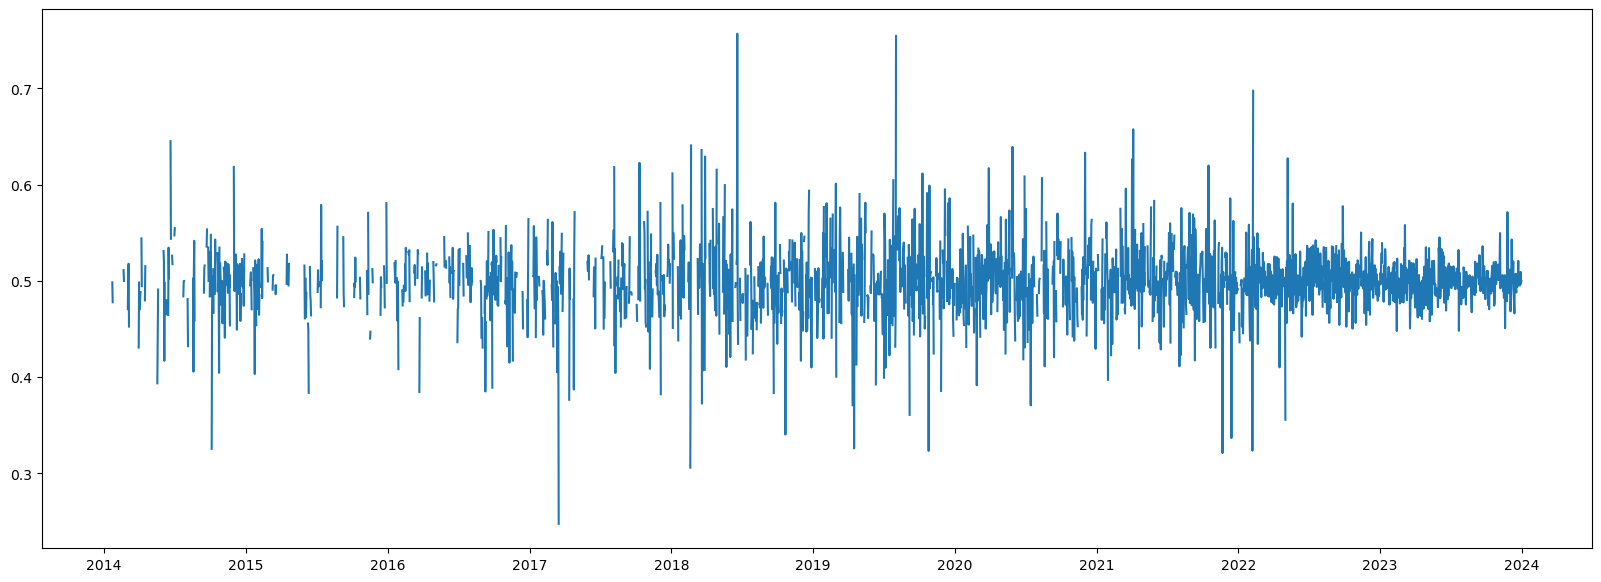

In [41]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(df['indicator'])